In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Construção de função para construir bases estatisticas

- **Média**: mostra o valor médio dos dados.
- **Variância amostral**: indica o quanto os valores estão espalhados em relação à média.
- **Intervalo Interquartil (IQR)**: mede a dispersão central dos dados, ou seja, a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). 

In [10]:
grupo1 = np.array([18, 20, 22, 24, 26, 28, 30, 32, 34, 36])
grupo2 = np.array([17, 21, 20, 26, 25, 29, 31, 30, 35, 36])

def estatisticas(grupo):
    media = np.mean(grupo)
    variancia = np.var(grupo, ddof=1)
    q1, q3 = np.percentile(grupo, [25, 75])
    iqr = q3 - q1
    return media, variancia, iqr

Comparação Estatística entre Dois Grupos

1. **Cálculo das estatísticas descritivas**:
   - Média, variância e intervalo interquartil (IQR) são calculados para cada grupo usando a função `estatisticas()`.

2. **Teste de normalidade (Shapiro-Wilk)**:
   - Verifica se os dados de cada grupo seguem uma distribuição normal.
   - Se o p-valor for maior que 0.05, assumimos que os dados são normalmente distribuídos.

3. **Escolha do teste estatístico**:
   - Se ambos os grupos passarem no teste de normalidade, aplica-se o **teste t de Student** (teste paramétrico).
   - Caso contrário, aplica-se o **teste de Mann-Whitney** (teste não paramétrico), que não assume distribuição normal.

4. **Interpretação dos resultados**:
   - Se o p-valor do teste estatístico for menor que 0.05, concluímos que há **diferença estatisticamente significativa** entre os grupos.
   - Caso contrário, não há evidência suficiente para afirmar que os grupos são diferentes do ponto de vista estatístico.

In [11]:
estatisticas_grupo1 = estatisticas(grupo1)
estatisticas_grupo2 = estatisticas(grupo2)

print(f"Grupo 1 - Média: {estatisticas_grupo1[0]:.2f} | Variância: {estatisticas_grupo1[1]:.2f} | IQR: {estatisticas_grupo1[2]:.2f}")
print(f"Grupo 2 - Média: {estatisticas_grupo2[0]:.2f} | Variância: {estatisticas_grupo2[1]:.2f} | IQR: {estatisticas_grupo2[2]:.2f}")

shapiro_grupo1 = stats.shapiro(grupo1)
shapiro_grupo2 = stats.shapiro(grupo2)

print(f"\nShapiro-Wilk Grupo 1: Estatística = {shapiro_grupo1.statistic:.4f}, p-valor = {shapiro_grupo1.pvalue:.4f}")
print(f"Shapiro-Wilk Grupo 2: Estatística = {shapiro_grupo2.statistic:.4f}, p-valor = {shapiro_grupo2.pvalue:.4f}")

if shapiro_grupo1.pvalue > 0.05 and shapiro_grupo2.pvalue > 0.05:
    teste_resultado = stats.ttest_ind(grupo1, grupo2)
    teste_nome = "Teste t de Student"
else:
    teste_resultado = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    teste_nome = "Teste de Mann-Whitney"

print(f"\n{teste_nome}:")
print(f"Estatística: {teste_resultado.statistic:.4f}")
print(f"p-valor: {teste_resultado.pvalue:.4f}")

if teste_resultado.pvalue < 0.05:
    print("Diferença estatisticamente significativa entre os grupos.")
else:
    print("Nenhuma diferença estatisticamente significativa entre os grupos.")

Grupo 1 - Média: 27.00 | Variância: 36.67 | IQR: 9.00
Grupo 2 - Média: 27.00 | Variância: 40.44 | IQR: 8.75

Shapiro-Wilk Grupo 1: Estatística = 0.9702, p-valor = 0.8924
Shapiro-Wilk Grupo 2: Estatística = 0.9620, p-valor = 0.8085

Teste t de Student:
Estatística: 0.0000
p-valor: 1.0000
Nenhuma diferença estatisticamente significativa entre os grupos.


Visualização Gráfica dos Dados

Criar dois tipos de gráficos para comparar visualmente a distribuição das idades nos dois grupos:

1. **Histograma com KDE (à esquerda)**:
   - Mostra a distribuição de frequências das idades em cada grupo.
   - A curva KDE (Kernel Density Estimation) ajuda a visualizar a forma da distribuição (por exemplo, se é simétrica ou assimétrica).
   - As cores diferenciam os grupos: azul para o Grupo 1 e vermelho para o Grupo 2.

2. **Boxplot (à direita)**:
   - Exibe a mediana, os quartis e possíveis outliers de cada grupo.
   - Permite comparar rapidamente a dispersão e a simetria dos dados.
   - Útil para identificar diferenças de posição (mediana) e de variabilidade (tamanho do intervalo interquartil - IQR) entre os grupos.

C:\Users\Aluno\AppData\Local\Temp\ipykernel_16036\2996099861.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupo", y="Idade", data=df, palette=["skyblue", "salmon"])


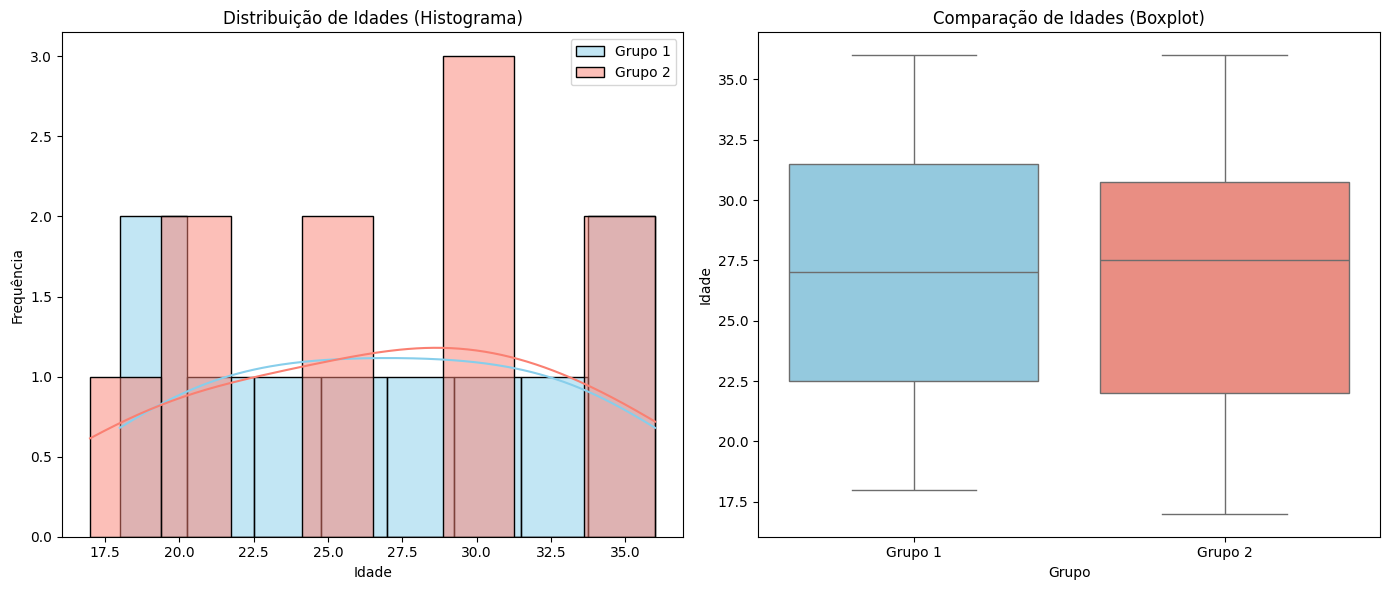

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(grupo1, kde=True, color="skyblue", label="Grupo 1", bins=8)
sns.histplot(grupo2, kde=True, color="salmon", label="Grupo 2", bins=8)
plt.title("Distribuição de Idades (Histograma)")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()

df = pd.DataFrame({
    "Idade": np.concatenate([grupo1, grupo2]),
    "Grupo": ["Grupo 1"] * len(grupo1) + ["Grupo 2"] * len(grupo2)
})

plt.subplot(1, 2, 2)
sns.boxplot(x="Grupo", y="Idade", data=df, palette=["skyblue", "salmon"])
plt.title("Comparação de Idades (Boxplot)")
plt.ylabel("Idade")

plt.tight_layout()
plt.show()